In [187]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [188]:
# Read in the image
I = cv2.imread("Dataset/Jigsaw_1/IMG_4635.JPG")

In [189]:
# convert to YUV
YUV = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
# split channels
Y, U, V = cv2.split(YUV)

# Apply blurring to U channel and thresholding [1], [2] 
blur = cv2.GaussianBlur(U, (25, 25), 0)
_, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [190]:
# extract the contours
contours, _ = cv2.findContours(mask, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

# attempted simple selection of largest contour after applying morphology, failed for shark 2 due to seabed

#create bounding rectangle
shark = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(shark)
cropped_images = []
cropped_masks = []
# Loop through contours
for c in contours:
    # bound the contour with a rectangle
    x, y, w, h = cv2.boundingRect(c)
    # find the area of the contour
    A = cv2.contourArea(c)

    cropped_images.append(I[y:y+h, x:x+w])
    cropped_masks.append(mask[y:y+h, x:x+w])

    plt.figure()
    plt.imshow(cropped_images[c])
    plt.show()


contours_img = cv2.cvtColor(mask.copy(), cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(contours_img, cv2.COLOR_BGR2RGB))
plt.title('All Contours')
plt.axis('off')
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 640x480 with 0 Axes>

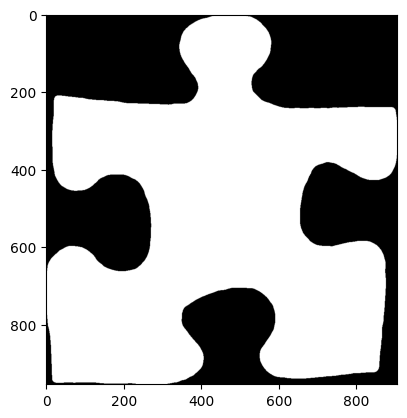

In [ ]:
# cropping the image and mask 
cropped_img = I[y:y+h, x:x+w]
cropped_mask = mask[y:y+h, x:x+w]

plt.imshow(cv2.cvtColor(cropped_mask, cv2.COLOR_BGR2RGB))

In [ ]:
# convert to YUV
cropped_img_YUV = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2YUV)
# split channels
Y2, U2, V2 = cv2.split(cropped_img_YUV)
# equalise the histogram
Y_new = cv2.equalizeHist(Y2)
# merge new y channel and convert back
YUV_new = cv2.merge([Y_new, U2, V2])
I_new = cv2.cvtColor(YUV_new, cv2.COLOR_YUV2BGR)

In [ ]:
# Apply kernel for enhancement
k = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], dtype=float)
I_kernel = cv2.filter2D(I_new, ddepth=-1, kernel=k)

In [ ]:
# extract the ROI, sets bg to black
shark_only= cv2.bitwise_and(I_kernel, I_kernel, mask=cropped_mask)

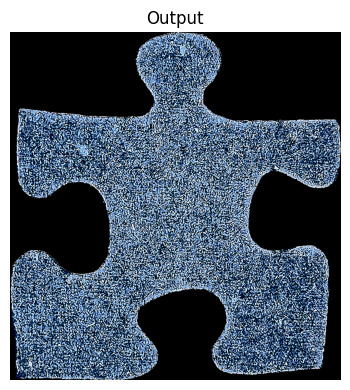

In [ ]:
# Plot image
plt.figure(figsize=(12, 4))
plt.imshow(cv2.cvtColor(shark_only, cv2.COLOR_BGR2RGB))
plt.title('Output')
plt.axis('off')
plt.tight_layout()
plt.show()

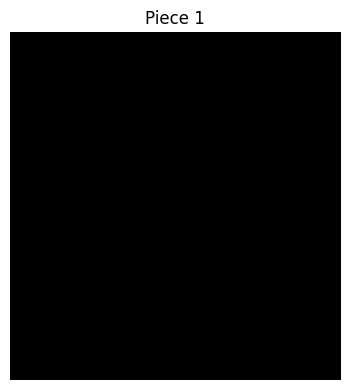

In [ ]:
# Loop through contours and display each piece
for idx, c in enumerate(contours):
    # Create mask for this contour only
    single_mask = np.zeros_like(cropped_mask)
    cv2.drawContours(single_mask, [c], -1, 255, -1)
    
    # Extract this piece using the single mask
    piece_only = cv2.bitwise_and(I_kernel, I_kernel, mask=single_mask)
    
    # Plot this piece
    plt.figure(figsize=(12, 4))
    plt.imshow(cv2.cvtColor(piece_only, cv2.COLOR_BGR2RGB))
    plt.title(f'Piece {idx + 1}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()